In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pprint
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import warnings
from numba.core.errors import NumbaDeprecationWarning

In [4]:
from sim_analysis import (
    read_gene_ranges,
    get_sim_runs,
    get_config,
    get_simid,
    get_r_hmrf_likelihoods,
    get_best_r_hmrf,
    get_true_clones,
    get_calico_best_clones,
    get_starch_clones,
    get_numbat_clones,
    plot_clones,
    get_cna_seglevel,
    read_true_gene_cna,
    plot_rdr_baf,
    get_clone_aris,
    plot_clone_aris,
    get_truth_cna_file,
    get_cna_f1s,
    plot_cna_f1s,
    get_sim_run_generator,
)

In [55]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", message="The palette list has more values")
warnings.filterwarnings("ignore", message="set_ticklabels() should only be used with a fixed number of ticks")

In [6]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 20)

plt.rcParams.update({'font.size': 14})

## Configuration

In [7]:
true_dir = "../simulated_data_related"
calico_pure_dir = "../nomixing_calicost_related"
numbat_dir = "../numbat_related"
starch_dir = "../starch_related"

calico_repo_dir = "/Users/mw9568/Work/ragr/CalicoST/"

## Preface

Note:
 - min. 100 spots per clone
 - assumes (max.) of 3 clones

In [8]:
gene_ranges = read_gene_ranges(calico_repo_dir)
gene_ranges

chr     start       end
gene                               
FAM138A       1     34554     36081
OR4F5         1     65419     71585
AL627309.1    1     89295    133723
AL627309.3    1     89551     91105
AL627309.2    1    139790    140339
...         ...       ...       ...
SHANK3       22  50674415  50733298
AC000036.1   22  50735825  50738139
ACR          22  50738196  50745339
AC002056.2   22  50740593  50743520
RABL2B       22  50767501  50783663

[35299 rows x 3 columns]

### Available Runs

In [9]:
sim_runs = get_sim_runs(calico_pure_dir)

with pd.option_context('display.max_rows', None):
    print(sim_runs)

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:181: UserWarning: None does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:181: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random0/clone3_rectangle0_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:181: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random2/clone3_rectangle2_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")


    n_cnas cna_size  ploidy  random                                  simid  nvalid
0   (1, 2)      1e7       2       0  numcnas1.2_cnasize1e7_ploidy2_random0       5
1   (1, 2)      1e7       2       1  numcnas1.2_cnasize1e7_ploidy2_random1       5
2   (1, 2)      1e7       2       2  numcnas1.2_cnasize1e7_ploidy2_random2       5
3   (1, 2)      1e7       2       3  numcnas1.2_cnasize1e7_ploidy2_random3       5
4   (1, 2)      1e7       2       4  numcnas1.2_cnasize1e7_ploidy2_random4       5
5   (1, 2)      1e7       2       5  numcnas1.2_cnasize1e7_ploidy2_random5       5
6   (1, 2)      1e7       2       6  numcnas1.2_cnasize1e7_ploidy2_random6       5
7   (1, 2)      1e7       2       7  numcnas1.2_cnasize1e7_ploidy2_random7       5
8   (1, 2)      1e7       2       8  numcnas1.2_cnasize1e7_ploidy2_random8       5
9   (1, 2)      1e7       2       9  numcnas1.2_cnasize1e7_ploidy2_random9       5
10  (1, 2)      3e7       2       0  numcnas1.2_cnasize3e7_ploidy2_random0       4
11  

### Config for a given run

In [11]:
# NB {2: numbat clones plot}.
sim_id = 0
initialization_seed = 0

# NB [(1, 2), "1e7", 2, random], [(3, 3), "3e7", 2, random]
run = sim_runs[["n_cnas", "cna_size", "ploidy", "random"]].iloc[sim_id].values

config = get_config(calico_pure_dir, *run, initialization_seed, verbose=True)

Reading configuration file: ../nomixing_calicost_related/numcnas1.2_cnasize1e7_ploidy2_random0/configfile0
  snp_dir: /u/congma/ragr-data/users/congma/Datasets/CalicoST_simulation/simulated_data_related/numcnas1.2_cnasize1e7_ploidy2_random0
  output_dir: /u/congma/ragr-data/users/congma/Datasets/CalicoST_simulation/nomixing_calicost_related/numcnas1.2_cnasize1e7_ploidy2_random0
  geneticmap_file: /u/congma/ragr-data/users/congma/Codes/CalicoST/resources/genetic_map_GRCh38_merged.tab
  hgtable_file: /u/congma/ragr-data/users/congma/Codes/STARCH_crazydev/hgTables_hg38_gencode.txt
  normalidx_file: None
  tumorprop_file: None
  supervision_clone_file: None
  filtergenelist_file: /n/fs/ragr-data/users/congma/references/cellranger_refdata-gex-GRCh38-2020-A/genes/ig_gene_list.txt
  filterregion_file: /n/fs/ragr-data/users/congma/references/cellranger_refdata-gex-GRCh38-2020-A/genes/HLA_regions.bed
  secondary_min_umi: 200
  min_snpumi_perspot: 50
  min_percent_expressed_spots: 0.005
  bafonl

In [13]:
df_clone = get_r_hmrf_likelihoods(calico_pure_dir, *run)
df_clone

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:204: UserWarning: None does not exist.
  )


initialization_seed  log_likelihood
0                    0   -7.462320e+06
1                    1   -7.050466e+06
2                    2   -7.493413e+06
3                    3   -7.479450e+06
4                    4   -7.470724e+06

In [14]:
true_clones = get_true_clones(true_dir, *run)
calico_clones = get_calico_best_clones(calico_pure_dir, *run, true_dir=true_dir)
starch_clones = get_starch_clones(starch_dir, *run, true_clones=true_clones)
numbat_clones = get_numbat_clones(numbat_dir, *run, true_clones=true_clones)
calico_clones

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:204: UserWarning: None does not exist.
  )
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1114: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random0/outs/clone_post_2.tsv does not exist.
  starch_clones.index.name = "spot"


est_clone true_clone   x   y
spot                              
0             2          2   0   0
1             2          2   0   2
2             2          2   0   4
3             2          2   0   6
4             2          2   0   8
...         ...        ...  ..  ..
2995          1          0  99  51
2996          1          0  99  53
2997          1          0  99  55
2998          1          0  99  57
2999          1          0  99  59

[3000 rows x 4 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:982: UserWarning: No clones to plot.
  ax.set_title(


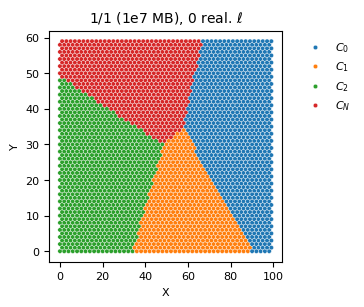

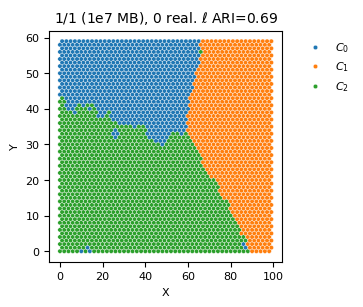

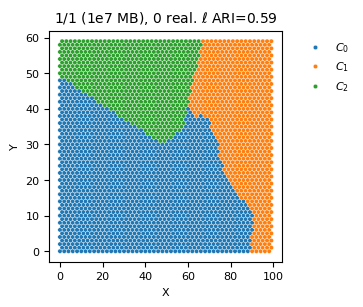

In [15]:
_ = plot_clones(true_clones, *run, truth=True)
_ = plot_clones(calico_clones, *run)
_ = plot_clones(starch_clones, *run)
_ = plot_clones(numbat_clones, *run)

In [19]:
best_cna_seglevel = get_cna_seglevel(
    calico_pure_dir,
    get_simid(*run),
    get_best_r_hmrf(calico_pure_dir, *run),
    ploidy="diploid",
    non_neutral_only=True,
)

with pd.option_context('display.max_rows', None):
    print(best_cna_seglevel)

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:204: UserWarning: None does not exist.
  )


    chr     start       end  clone0 a  clone0 b  clone1 a  clone1 b  clone2 a  clone2 b  global_cna
0     8  89933336  94261610         1         1         3         3         1         1       False
1     8  94487689  94526241         1         1         3         3         1         1       False
2     8  94641074  94679912         1         1         3         3         1         1       False
3     8  94719703  94948284         1         1         3         3         1         1       False
4    12  57253762  62336404         1         1         0         2         1         1       False
5    12  62466817  62595903         1         1         0         2         1         1       False
6    12  62602752  64151353         1         1         0         2         1         1       False
7    12  64404392  64697535         1         1         0         2         1         1       False
8    12  64713445  64739865         1         1         0         2         1         1       False


In [22]:
true_gene_cna = read_true_gene_cna(
    true_dir,
    *run,
    gene_ranges,
    non_neutral_only=True
)
true_gene_cna

chr      start        end  clone0 a  clone0 b clone0_gtype clone0_ctype  clone1 a  clone1 b clone1_gtype clone1_ctype  clone2 a  clone2 b clone2_gtype clone2_ctype  global_cna
0      5  102141893  102146874         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
1      5  102233986  102296284         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
2      5  102371774  102499016         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
3      5  102500541  102505670         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
4      5  102581368  102617589         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
..   ...        ...        ...       ...       ...          ...          ...       ...       ...          ...          ...       ...       ...          ...          ...         ...
784   20   61267525   61271827         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False
785   20   61369879   61370855         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False
786   20   61432868   61437630         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False
787   20   61717506   61719748         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False
788   20   61738219   61755056         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False

[789 rows x 16 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:205: UserWarning: None does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:397: RuntimeWarning: invalid value encountered in divide
  [map_cn[(major[i], minor[i])] for i in range(len(major))],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:397: RuntimeWarning: invalid value encountered in divide
  [map_cn[(major[i], minor[i])] for i in range(len(major))],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:397: RuntimeWarning: invalid value encountered in divide
  [map_cn[(major[i], minor[i])] for i in range(len(major))],


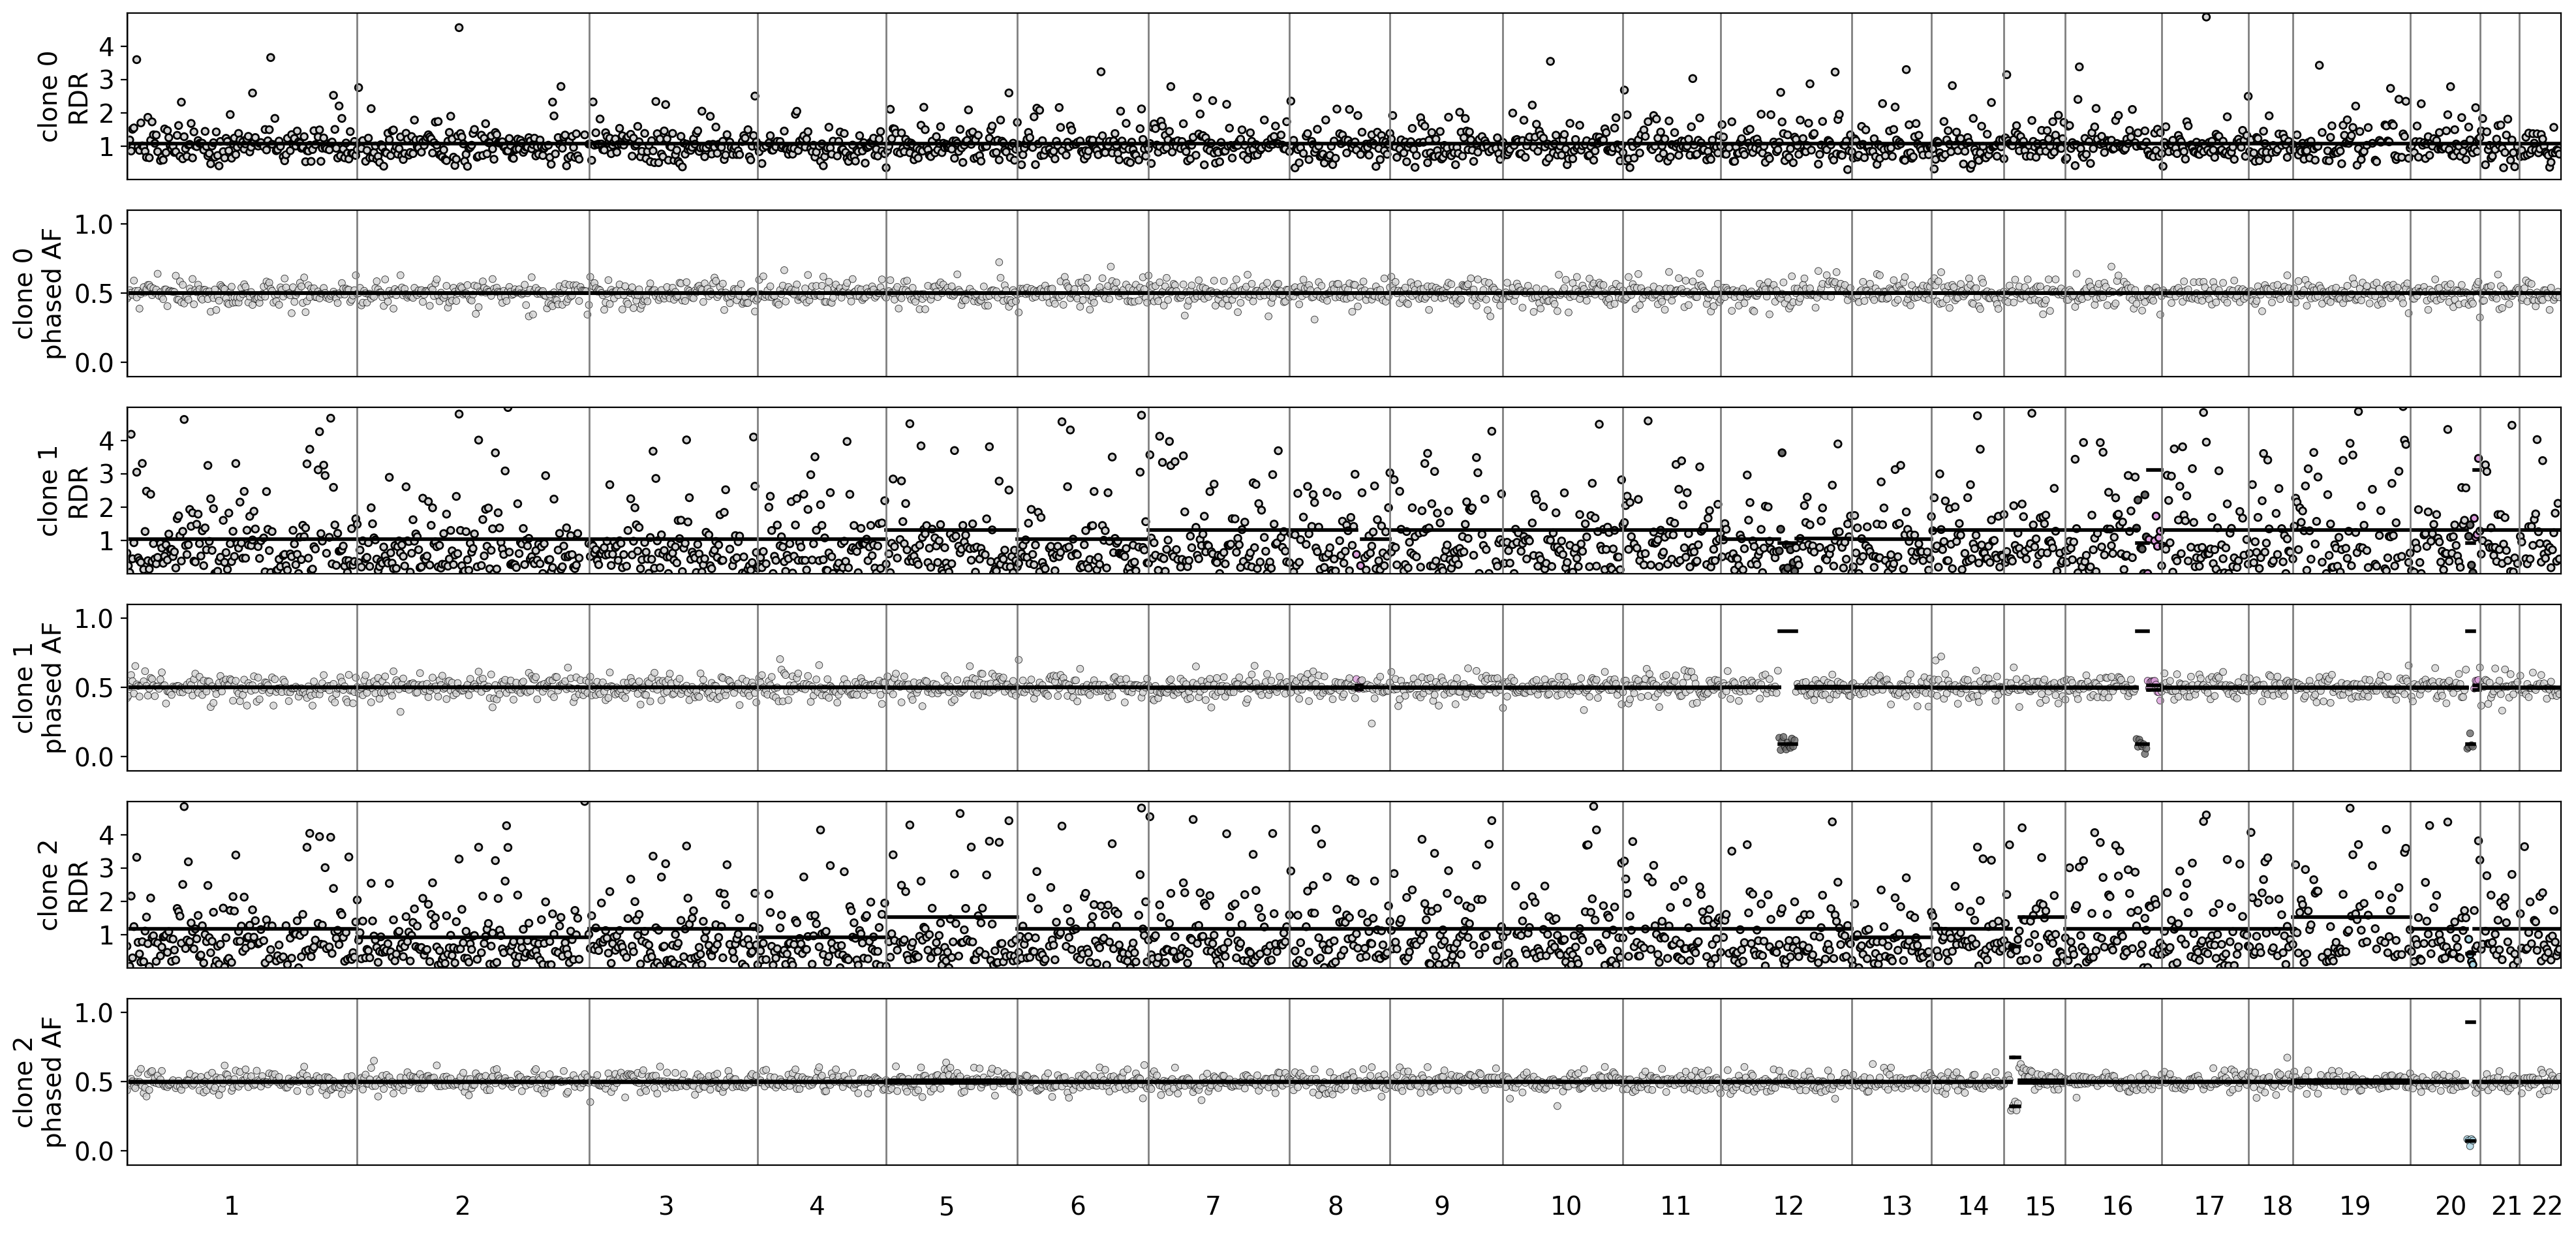

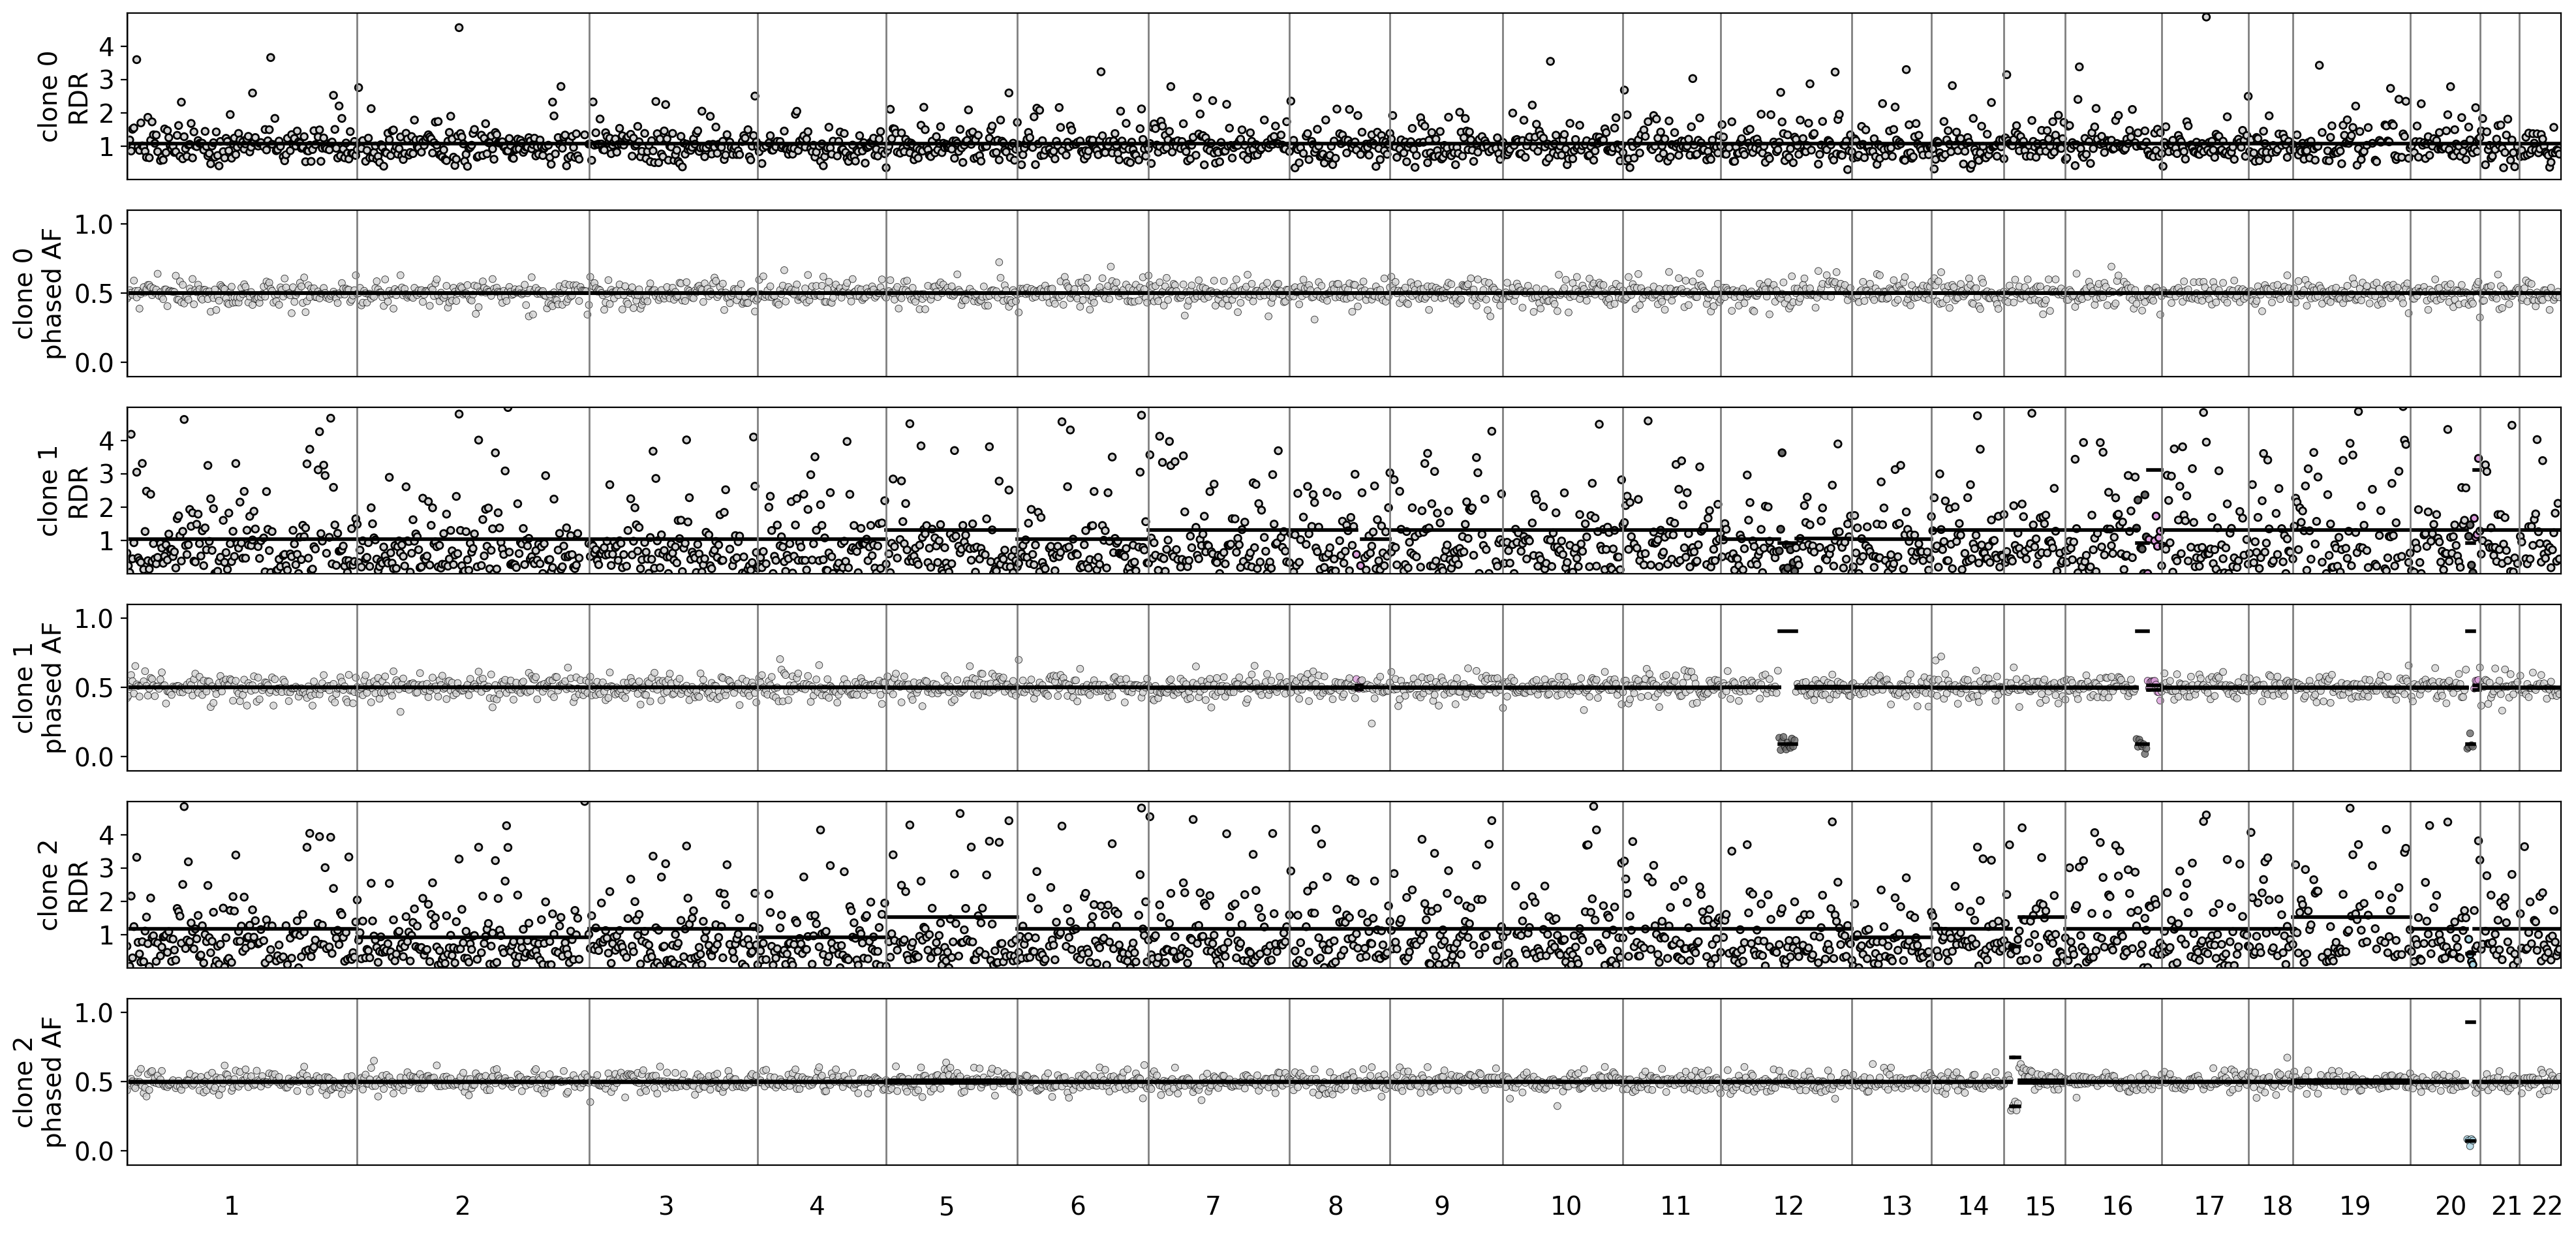

In [36]:
best_run_initialization = get_best_r_hmrf(calico_pure_dir, *run)

plot_rdr_baf(calico_pure_dir, *run, best_initialization_seed)

# Clone identification accuracy

In [40]:
clone_aris = get_clone_aris(true_dir, calico_pure_dir, numbat_dir, starch_dir)

# NB best CalicoST clones only; 90 sims X 3 methods.
assert len(clone_aris) == 270

clone_aris

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:205: UserWarning: None does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1116: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random0/outs/clone_post_2.tsv does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:205: UserWarning: None does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1116: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random1/outs/clone_post_2.tsv does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:205: UserWarning: None does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:205: UserWarning: None does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:205: UserWarning: None does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1116: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random4/outs/clone_post_2.tsv do

cnas  n_cnas cna_size  ploidy  random                              sample_id                                   true_clones_path    method    recall       ari                                   best_clones_path
0    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST  0.932434  0.694395  ../nomixing_calicost_related/numcnas1.2_cnasiz...
1    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...    Numbat  0.000000  0.000000  ../numbat_related/numcnas1.2_cnasize1e7_ploidy...
2    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...    Starch  0.895988  0.585557  ../starch_related/numcnas1.2_cnasize1e7_ploidy...
3    (1, 2)       3     10Mb       2       1  numcnas1.2_cnasize1e7_ploidy2_random1  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST  0.944614  0.651819  ../nomixing_calicost_related/numcnas1.2_cnasiz...
4    (1, 2)       3     10Mb       2       1  numcnas1.2_cnasize1e7_ploidy2_random1  ../simulated_data_related/numcnas1.2_cnasize1e...    Numbat  0.000000  0.000000  ../numbat_related/numcnas1.2_cnasize1e7_ploidy...
..      ...     ...      ...     ...     ...                                    ...                                                ...       ...       ...       ...                                                ...
265  (6, 3)       9     50Mb       2       8  numcnas6.3_cnasize5e7_ploidy2_random8  ../simulated_data_related/numcnas6.3_cnasize5e...    Numbat  0.505462  0.396501  ../numbat_related/numcnas6.3_cnasize5e7_ploidy...
266  (6, 3)       9     50Mb       2       8  numcnas6.3_cnasize5e7_ploidy2_random8  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch  0.989957  0.911511  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
267  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...  CalicoST  0.949296  0.942561  ../nomixing_calicost_related/numcnas6.3_cnasiz...
268  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Numbat  0.879347  0.848603  ../numbat_related/numcnas6.3_cnasize5e7_ploidy...
269  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch  0.836786  0.169663  ../starch_related/numcnas6.3_cnasize5e7_ploidy...

[270 rows x 11 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1337: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  


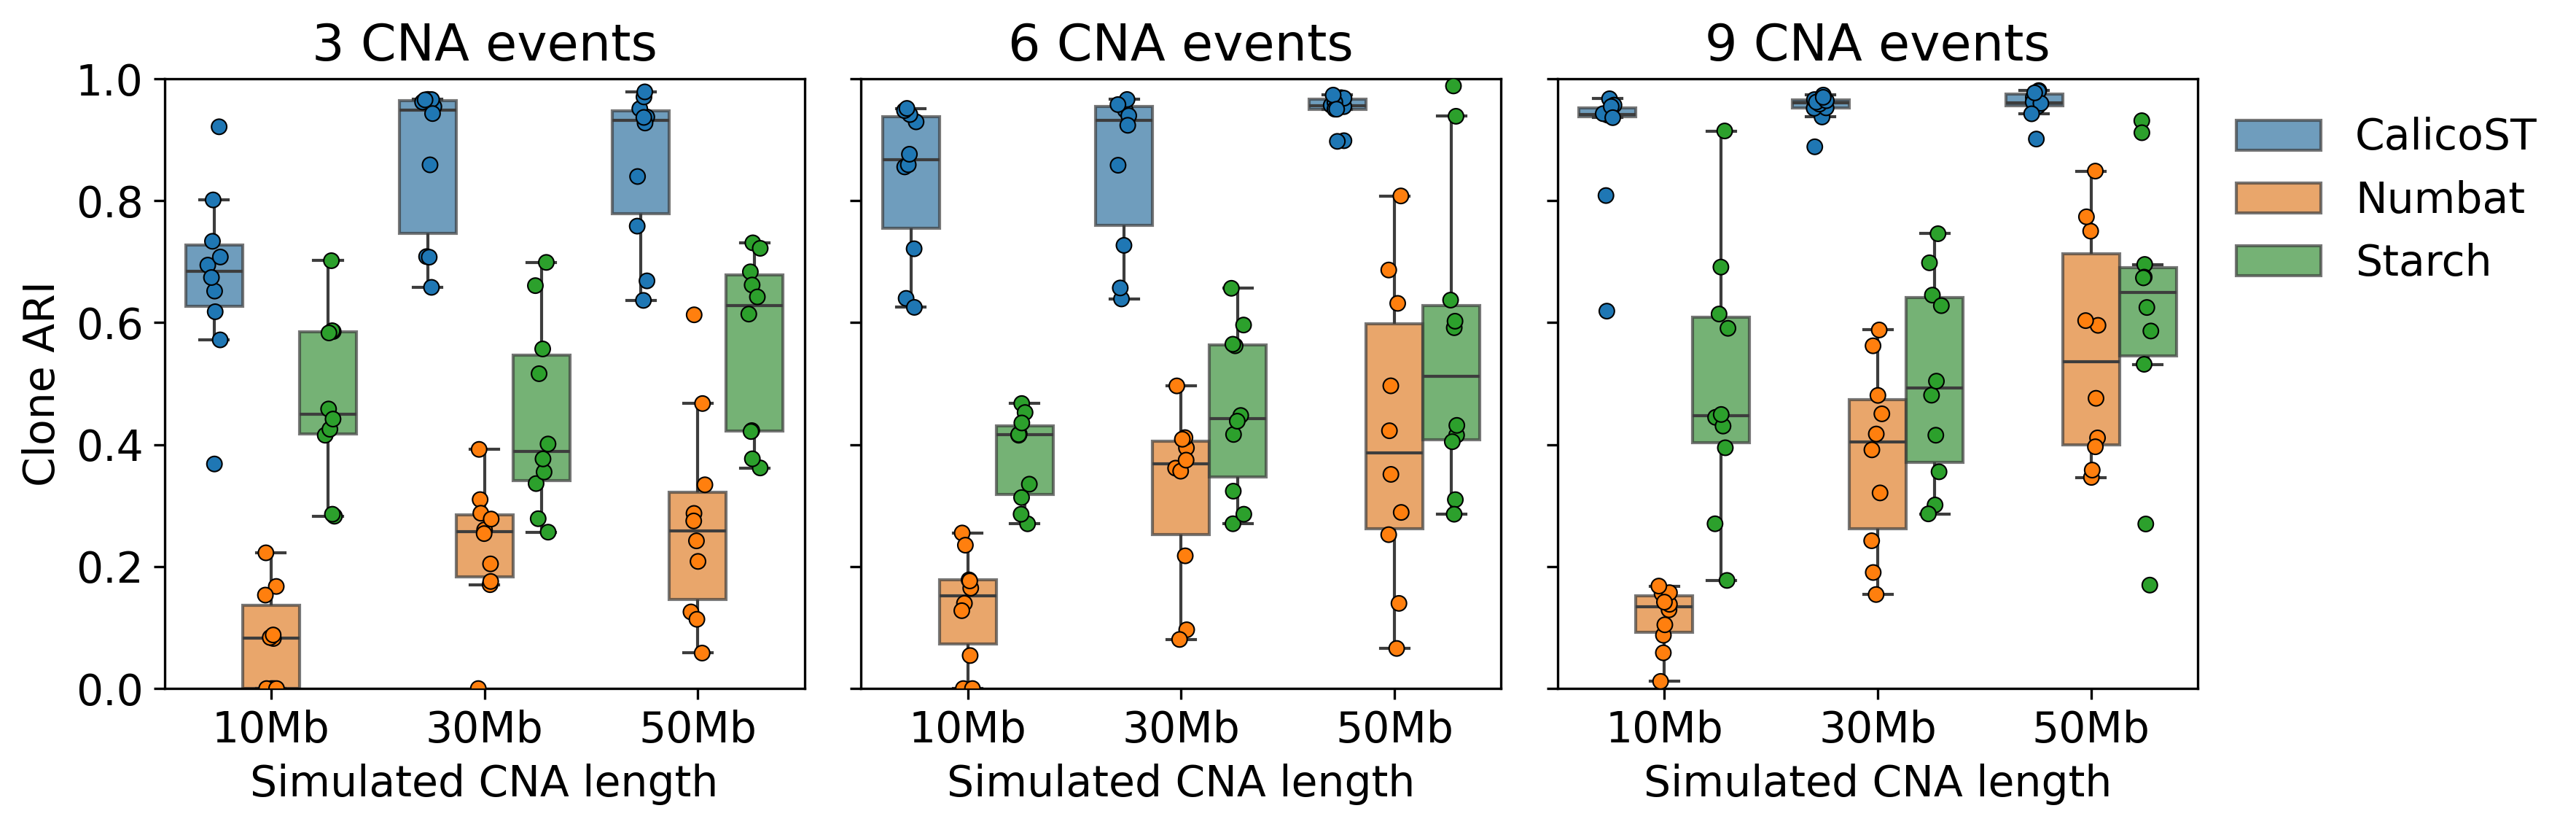

In [41]:
plot_clone_aris(clone_aris)

# Event detection accuracy

The detection accuracy is evalated on a per-gene level:
the precision & sensitivity of genes involved in each category of event (Deletion, Amplication, LOH) for all events.

In [52]:
cna_f1s = get_cna_f1s(calico_repo_dir, true_dir, calico_pure_dir, numbat_dir, starch_dir)

# NB best CalicoST clones only; 90 sims X 3 methods X 4 types (DEL, AMP, CNLOH, ALL).
assert len(cna_f1s) == 1080

cna_f1s

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:206: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random0/clone3_rectangle0_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:206: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize3e7_ploidy2_random2/clone3_rectangle2_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  


cnas  n_cnas cna_size  ploidy  random                              sample_id                                   true_clones_path    method  event        F1                                           true_cna                                       est_cna_file
0     (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST    DEL  0.378378  ../simulated_data_related/numcnas1.2_cnasize1e...  ../nomixing_calicost_related/numcnas1.2_cnasiz...
1     (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST    AMP  0.115756  ../simulated_data_related/numcnas1.2_cnasize1e...  ../nomixing_calicost_related/numcnas1.2_cnasiz...
2     (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST  CNLOH  0.790698  ../simulated_data_related/numcnas1.2_cnasize1e...  ../nomixing_calicost_related/numcnas1.2_cnasiz...
3     (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST    ALL       NaN  ../simulated_data_related/numcnas1.2_cnasize1e...  ../nomixing_calicost_related/numcnas1.2_cnasiz...
4     (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...    Numbat    DEL       0.0  ../simulated_data_related/numcnas1.2_cnasize1e...  ../numbat_related/numcnas1.2_cnasize1e7_ploidy...
...      ...     ...      ...     ...     ...                                    ...                                                ...       ...    ...       ...                                                ...                                                ...
1075  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Numbat    ALL       NaN  ../simulated_data_related/numcnas6.3_cnasize5e...  ../numbat_related/numcnas6.3_cnasize5e7_ploidy...
1076  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch    DEL  0.134228  ../simulated_data_related/numcnas6.3_cnasize5e...  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
1077  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch    AMP       0.0  ../simulated_data_related/numcnas6.3_cnasize5e...  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
1078  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch  CNLOH       0.0  ../simulated_data_related/numcnas6.3_cnasize5e...  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
1079  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch    ALL       NaN  ../simulated_data_related/numcnas6.3_cnasize5e...  ../starch_related/numcnas6.3_cnasize5e7_ploidy...

[1080 rows x 12 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1505: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_ylim(-0.05, 1.05)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1505: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_ylim(-0.05, 1.05)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1505: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_ylim(-0.05, 1.05)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1505: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, j].set_ylim(-0.05, 1.05)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1505: UserWarning: set_ticklabels() sho

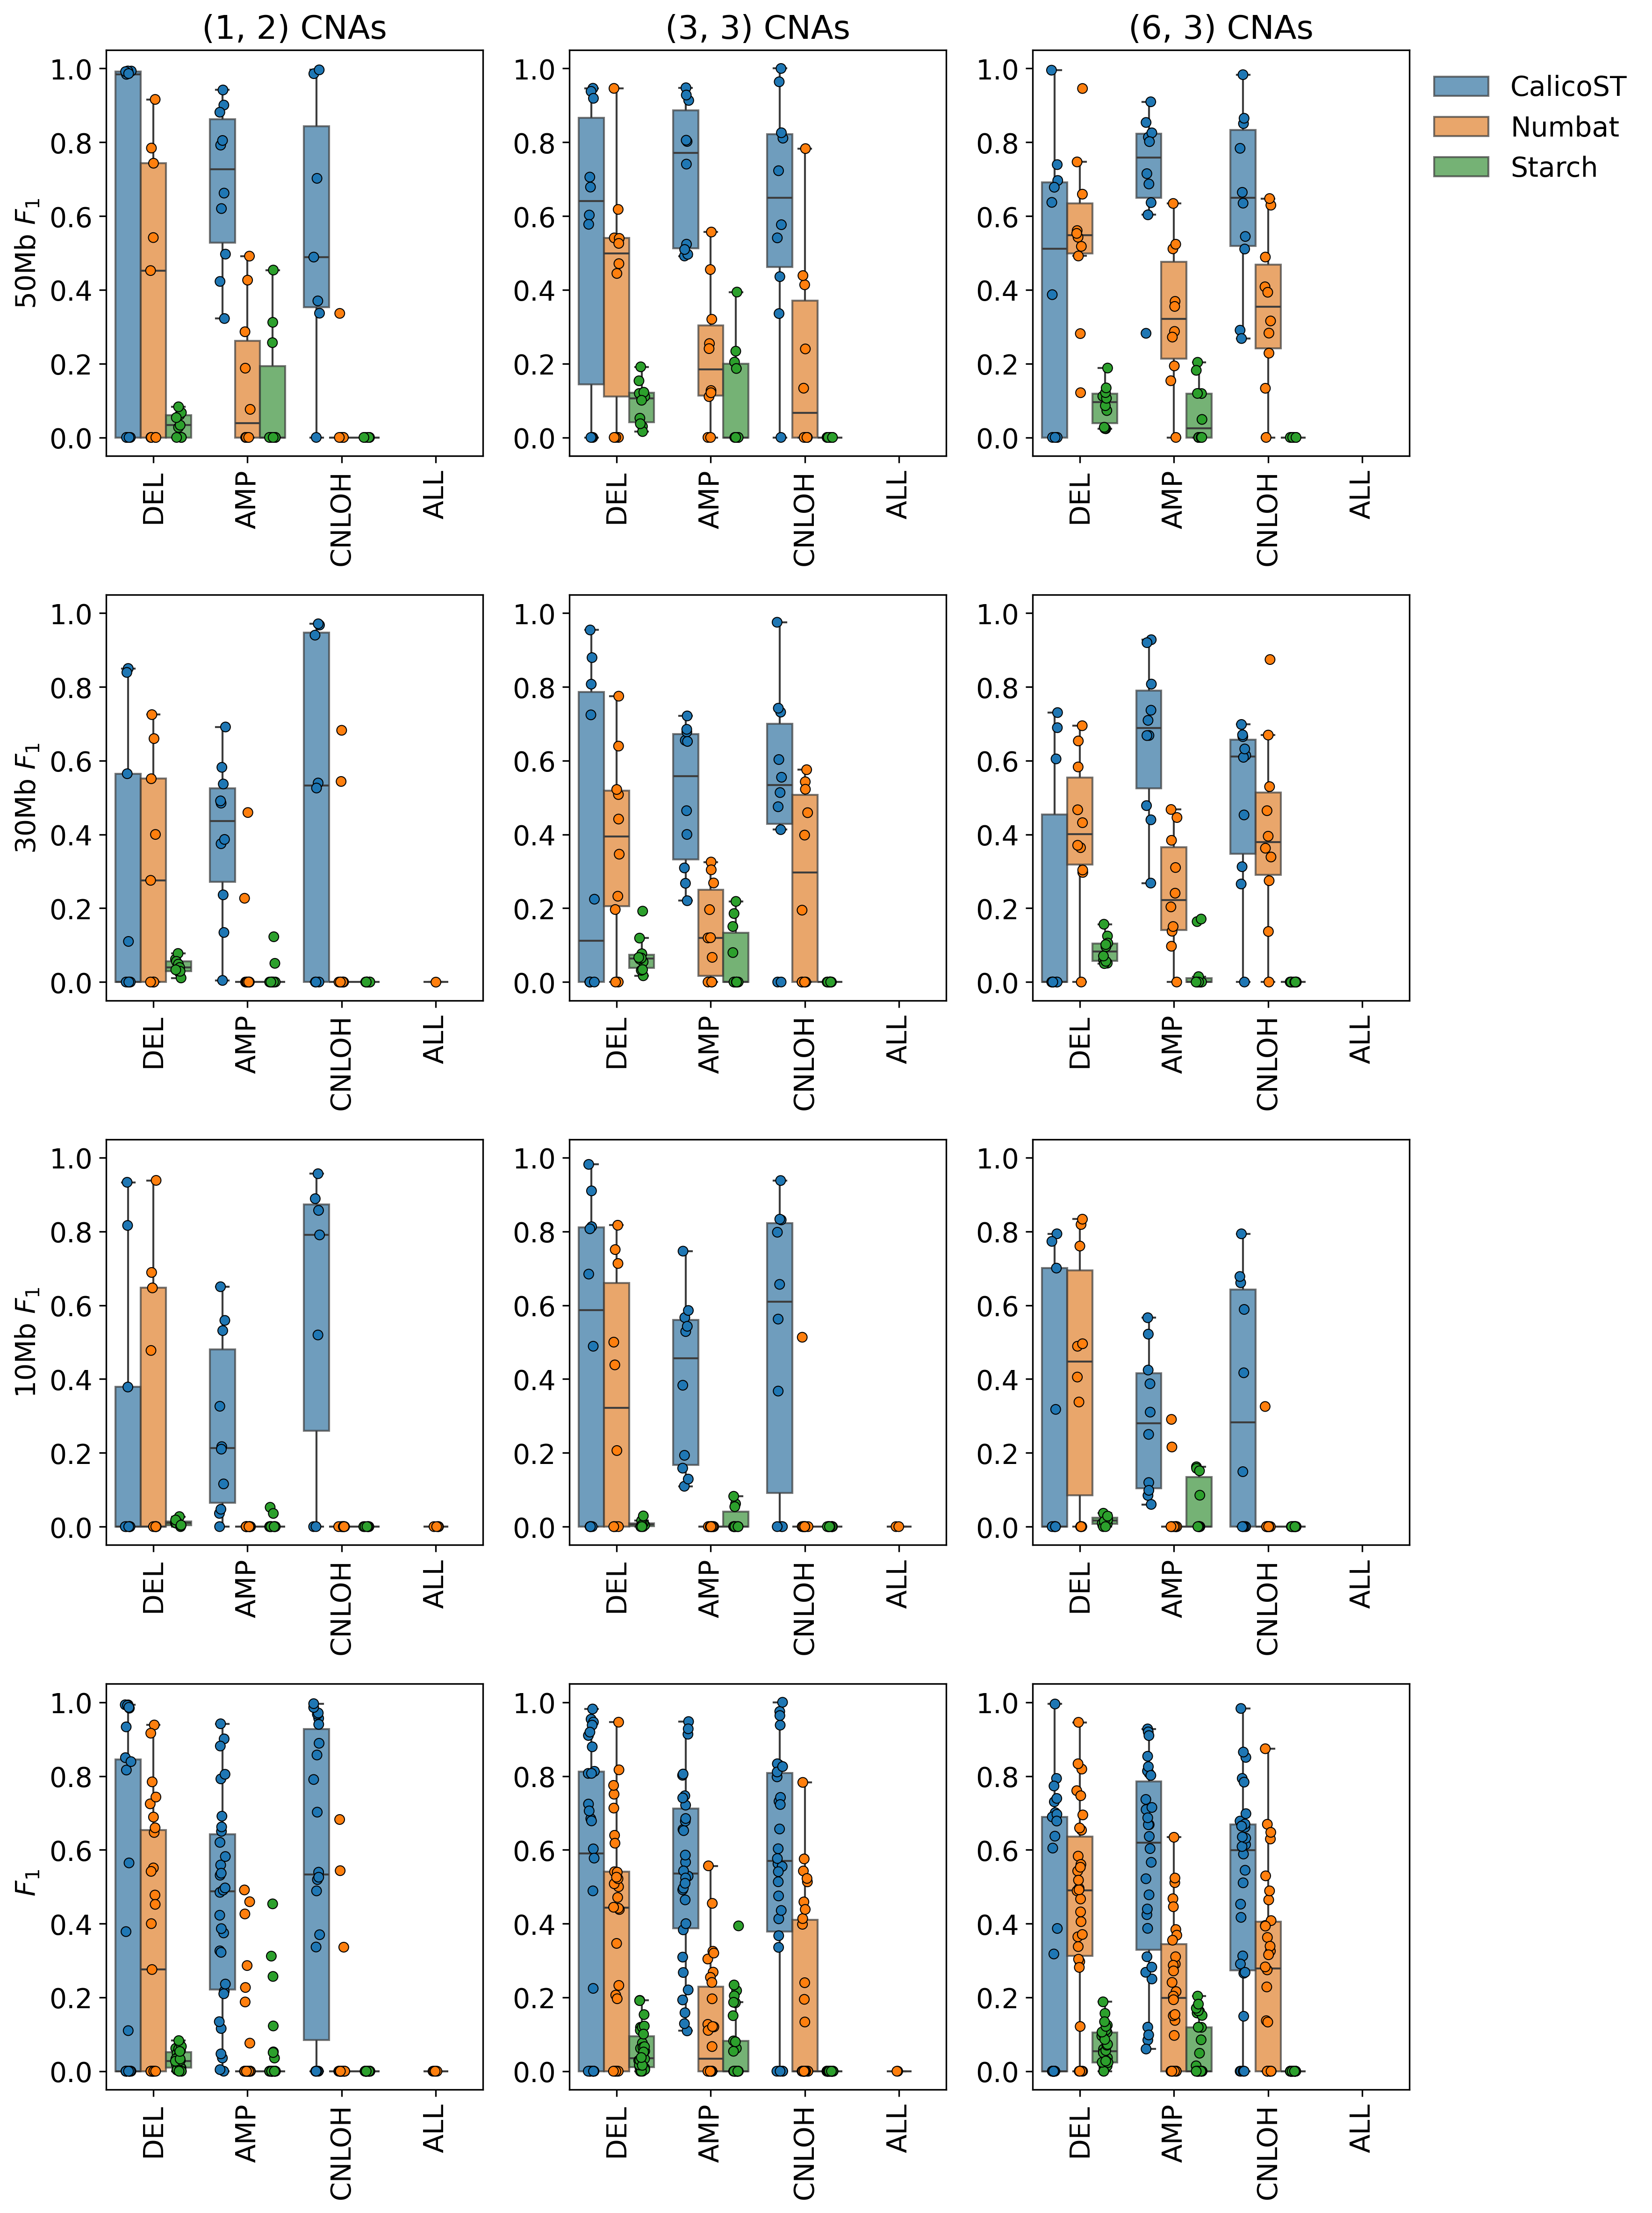

In [63]:
plot_cna_f1s(cna_f1s)

# Done.